# ENSAI3A - Privacy-Preserving Data Publishing
## Lab session : Differential privacy and the Laplace Mechanism (kickstarter)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp
import seaborn as sns

## Loading data

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
         'marital-status', 'occupation', 'relationship', 'race',
         'gender', 'capital-gain', 'capital-loss', 'hours-per-week',
         'native-country', 'income']

adult = pd.read_csv(url, sep=',\s+', header=None, names=names, na_values='?', engine='python', skipinitialspace=True)

adult.dropna(inplace=True)

adult

age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race  gender  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical      Own-child  White    Male   
32560  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0              2174             0              40  United-States  <=50K  
1                 0             0              13  United-States  <=50K  
2                 0             0              40  United-States  <=50K  
3                 0             0              40  United-States  <=50K  
4                 0             0              40           Cuba  <=50K  
...             ...           ...             ...            ...    ...  
32556             0             0              38  United-States  <=50K  
32557             0             0              40  United-States   >50K  
32558             0             0              40  United-States  <=50K  
32559             0             0              20  United-States  <=50K  
32560         15024             0              40  United-States   >50K  

[30162 rows x 15 columns]

## Performing the queries needed

### Query C: number of non-white people

In [3]:
sum(adult['race'] != 'White')

4229

### Query A: average age of people with income over 50K

In [4]:
adult[adult['income'] == '>50K']['age'].mean()

43.95911028236548

### Query H1: distribution of the education level

In [5]:
adult['education'].value_counts()

HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64

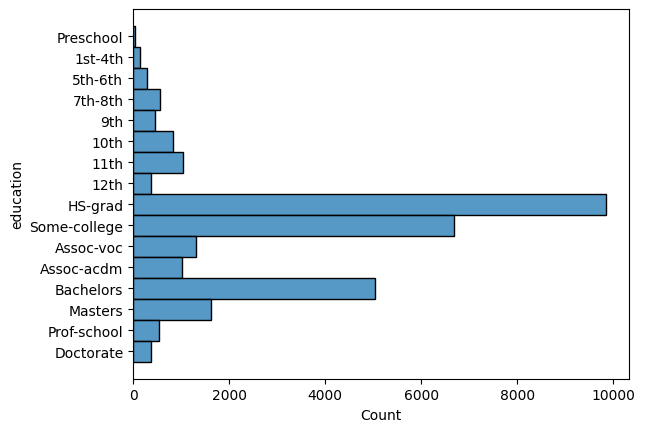

In [6]:
sns.histplot(data=adult.sort_values(by='education-num'), y='education');

### Query H2: distribution of working hours per week for people with income over 50K

In [7]:
pd.cut(adult[adult['income'] == '>50K']['hours-per-week'], bins=10).value_counts()

(30.4, 40.2]     3478
(40.2, 50.0]     2290
(59.8, 69.6]      751
(50.0, 59.8]      435
(69.6, 79.4]      151
(20.6, 30.4]      137
(10.8, 20.6]      114
(79.4, 89.2]       73
(89.2, 99.0]       41
(0.902, 10.8]      38
Name: hours-per-week, dtype: int64

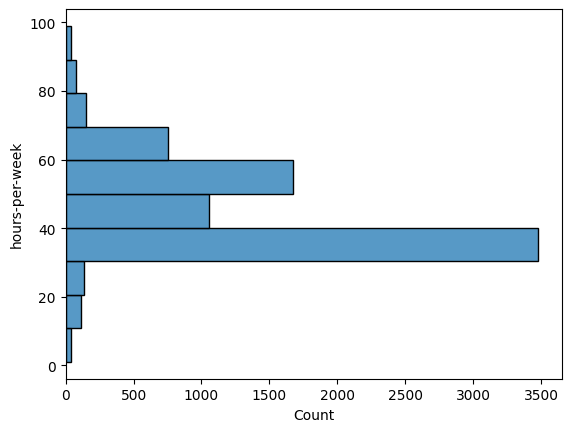

In [8]:
sns.histplot(data=adult[adult['income'] == '>50K'], y='hours-per-week', bins=10);

## How to plot ? By the example...

### Q1. Write a function to generate random numbers following the Laplace distribution. 

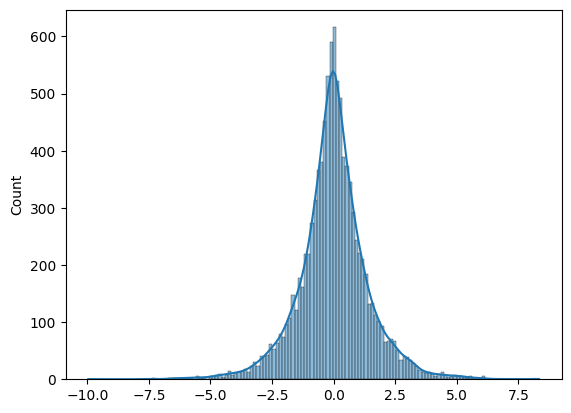

In [9]:
lap = np.random.laplace(loc=0, scale=1, size=10000) # Use numpy to generate laplace distribution

sns.histplot(lap, kde=True);

Kolmogorov-Smirnov test

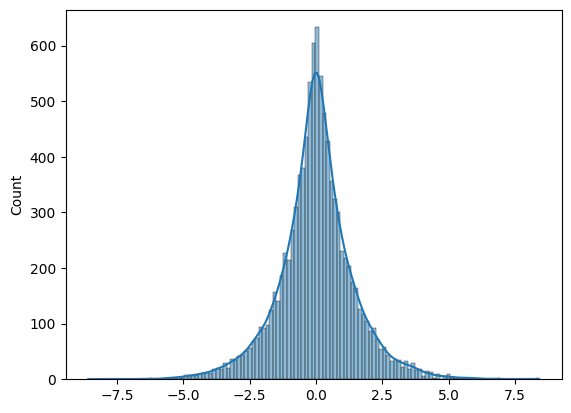

In [10]:
lap2 = np.random.laplace(loc=0, scale=1, size=10000)

sns.histplot(lap2, kde=True);

In [11]:
#TODO : Choose your favorite test for checking that lap and lap2 come from the same distribution (e.g., see ks_2samp(.)).

from scipy.stats import ks_2samp
ks_2samp(lap,lap2)

KstestResult(statistic=0.0135, pvalue=0.32189015194890147)

As we could see from the result that the p value is higher then the significance level (0.05), so we coundn't reject the original hypothesis, which means that lap and lap2 come from the same distribution.

### Another plot

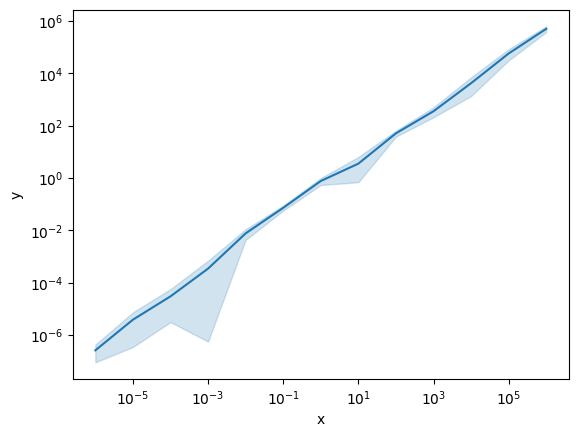

In [12]:
x = np.logspace(-6, 6, num=13)  # [10^-6, 10^-5, ... 10^6]
x3 = np.repeat(x, 3)  # Repeat each value 3 times

y = np.random.random(size=len(x3)) * x3

ax = sns.lineplot(x='x', y='y', estimator='mean', errorbar='sd', data=pd.DataFrame({'x': x3, 'y': y}))
ax.set(xscale='log', yscale='log');

### Yet another plot

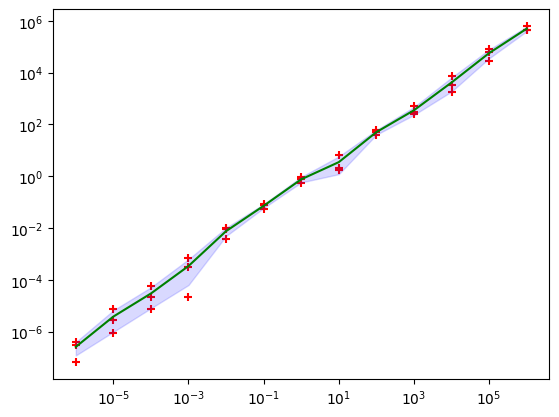

In [13]:
# Group repeated values over the same dimension: 
# [[10^-6, 10^-6, 10^-6], [10^-5, 10^-5, 10^-5], ...]
y3 = y.reshape(-1, 3)

# Compute average and std for each repeated x value
y_avg = np.mean(y3, axis=1)
y_err = np.std(y3, axis=1)

_, ax = plt.subplots(1)
ax.set(xscale='log', yscale='log')
ax.scatter(x3, y, color='red', marker='+')
ax.plot(x, y_avg, color='green')
ax.fill_between(x, y_avg+y_err, y_avg-y_err, color='blue', alpha=0.15);

## Laplace mechanism

### Q1. Write a function to generate random numbers following the Laplace distribution. 

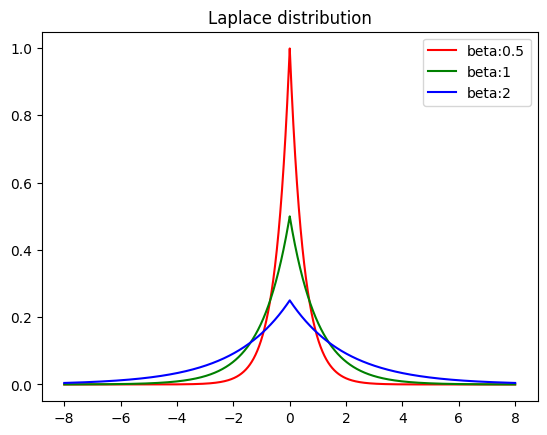

In [14]:
# Define laplace function
def laplace_function(x,beta):
    result = (1/(2*beta)) * np.e**(-1*(np.abs(x)/beta))
    return result

# Take 10000 numbers in equal intervals between -8 and 8
x = np.linspace(-8,8,10000)
y1 = [laplace_function(x_,0.5) for x_ in x]
y2 = [laplace_function(x_,1) for x_ in x]
y3 = [laplace_function(x_,2) for x_ in x]

# Generate 3 different function with different beta
plt.plot(x,y1,color='r',label='beta:0.5')
plt.plot(x,y2,color='g',label='beta:1')
plt.plot(x,y3,color='b',label='beta:2')
plt.title("Laplace distribution")
plt.legend()

### Q2. Write a function that implements the Laplace mechanism.

The Laplace Mechanism means that we need to add a laplace distribution noise in our main function. And based on the priority of Laplace distribution, if we want a less perturbation, we need to set a big epsilon.

In [15]:
# Calculate the noise based on Laplace distribution
def laplace_noisy(sensitivety,epsilon):
    n_value = np.random.laplace(0, sensitivety/epsilon, 1)
    return n_value

# Calculate the outcome value based on the Laplace noise  
def laplace_mech(data, sensitivety, epsilon):
    for i in range(len(data)):
        data[i] += laplace_noisy(sensitivety,epsilon)
    return data
 
# Main fucntion
if __name__ =='__main__':
    data = [1.,2.,3.]
    sensitivety = 1 # Sensitivity parameter
    epsilon = 10    # Privacy parameter
    data_noisy = laplace_mech(data, sensitivety, epsilon)
    for j in data_noisy:
        print("Final Result = %.16f" % j)

Final Result = 1.3026543219519109
Final Result = 2.1178981798834129
Final Result = 2.9283265455526593


Here we take the dataset (1,2,3) as an example to present the performance of our laplace mechanism. As we could see from the result that the output of this dataset is the orginal dataset + laplace noise, which means our function runs well.

### Q3. How to perturb a count? A sum?...An average?

<h4 >A. Perturb a count</h4>

It's easy to perturb a count, we take Query C for example, we would like to add noise to this number of non-white people query.

In [16]:
# Query C
sum(adult['race'] != 'White')

4229

In [17]:
sensitivity = 1
epsilon = 0.1

sum(adult['race'] != 'White') + np.random.laplace(loc=0, scale=sensitivity/epsilon)

4213.69499558998

We could compare this outcome with perivous Query C outcome (4229), we could see that the there is a tiny difference between them, which satisfy our requirements. 

<h4 >B. Perturb a sum</h4>

First let's build a summation query. We would like to calculate the total age of people with more than 10 years of education. Here is our query.

In [18]:
adult[adult['education-num'] > 10]['age'].sum()

395303

Perturb a sum is not as easy as perturb a count, because if we add new recods into our dataset, the outcome of this age query will be influenced by our adding records. When there is no lower or upper bounds on the value of the summed property, we could see that the summation queries have an infinite sensitivity. When this happens we could use clipping to add a lower or upper bounds to our queries. First, we would like to draw a histogram to present the distribution of age in our dataset.

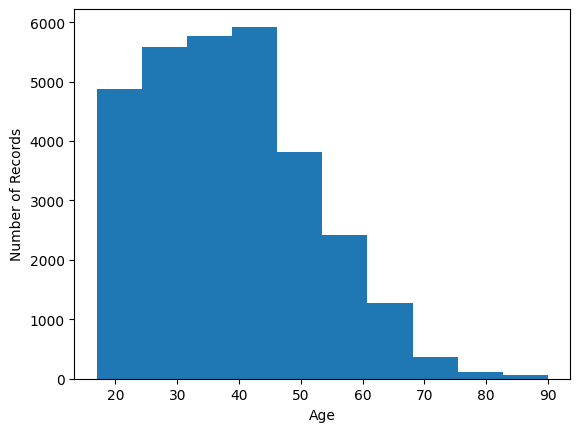

In [19]:
plt.hist(adult['age'])
plt.xlabel('Age')
plt.ylabel('Number of Records');

We could find that, no one in this particular dataset exceed 90 years ago, we may want to simply set our lower bounds to 0 and upper bounds to 90. But this is actually not a differential privacy, because these bounds will reveal certain information about the data, and the attackers will know that there is no one exceeds 90.  

So, we would like to set a funtion to find our upper bounds. The specific method is we set our lower bounds with 0 (I guess we have no doubt with this lower bounds,hh). And for the upper bounds, we smoothly increase it, until the outcome of the queries stop changing, which means that we didn't add new records into our dataset through increasing the bounds.

For example, let's calculate the sum of ages with the upper bounds from 0 to 100. And for each seperate bounds, we use Laplace Mechanisme to ensure the differential privacy.

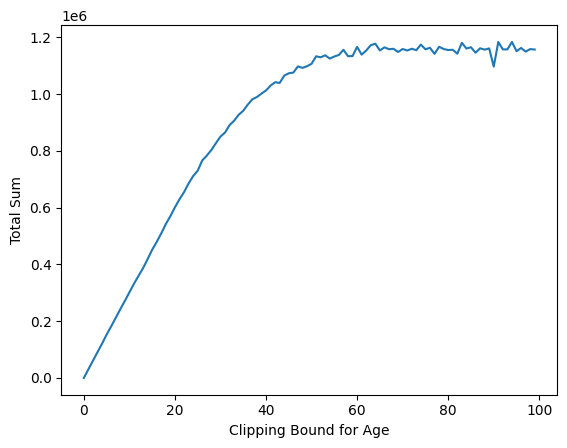

In [20]:
def laplace_mec(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity/epsilon)

epsilon_i = .01
plt.plot([laplace_mec(adult['age'].clip(lower=0, upper=i).sum(), i, epsilon_i) for i in range(100)])
plt.xlabel('Clipping Bound for Age')
plt.ylabel('Total Sum');

The total privacy cost of this queries is 1, so we execute 100 queries , and the privacy cost of each queries is 0.01. Obviously, we could find from the picture that the results converge around upper bounds = 80, so we could set 80 as our upper bounds. 

In [21]:
i = 80

laplace_mec(adult[adult['education-num'] > 10]['age'].clip(lower=0, upper=i).sum(), i, epsilon_i)

398882.8103606293

Compare with the previous result (395303), this outcome is reasonable and contains the laplace noise. 

<h4 >C. Perturb an average</h4>

Take the query A as an example, we would like to perturb this average query.

In [22]:
# Query A
adult[adult['income'] == '>50K']['age'].mean()

43.95911028236548

The easiest way to perturb this average query is to reformulate this into 2 queries: Summation Query/ Counting Query, like the formula below, and use Laplace mechanism seperately in this two queries.

In [23]:
adult[adult['income'] == '>50K']['age'].sum() / adult[adult['income'] == '>50K']['age'].shape[0]

43.95911028236548

In [24]:
sensitivity = 1
epsilon = 1
epsilon_i = .01
i = 80

laplace_mec(adult[adult['income'] == '>50K']['age'].clip(lower=0, upper=i).sum(), i, epsilon_i) \
/(adult[adult['income'] == '>50K']['age'].shape[0]+ np.random.laplace(loc=0, scale=sensitivity/epsilon))

43.774675710649205

### Q4. Use the Laplace mechanism, with avarying privacy budget ε.

<h4 >4.1 Query C</h4>

In [25]:
# I could finish this part thanks for Mariem's assistance
# Rewrite the query C result
C = sum(adult['race'] != 'White')

# Define the execute conditions
epsilons = [0.001, 0.01, 0.1, 1, 10]
sensitivity = 1
num_exe = 100

# Relative errors list for query C
errors_C = []

In [26]:
# Execute C perturb 5 times and store them in the errors_C list
for epsilon in epsilons:
    errors = []
    for _ in range(num_exe):
        #print(true_result)
        C_per = sum(adult['race'] != 'White') + np.random.laplace(loc=0, scale=sensitivity/epsilon)
        #print(perturbed_result)
        errors.append(abs(C_per - C)/C)
    errors_C.append(errors)

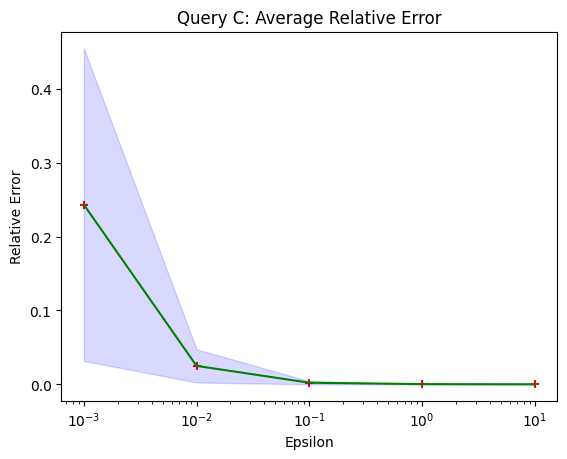

In [27]:
# Draw the relative error grach, with the standard deviation as a confidance interval
_, ax = plt.subplots(1)
ax.set(xscale='log', yscale='linear')
c_avg_errors = [np.mean(errors) for errors in errors_C]
c_std_errors = [np.std(errors) for errors in errors_C]
ax.scatter(epsilons, c_avg_errors, color='red', marker='+')
ax.plot(epsilons, c_avg_errors, color='green')
ax.fill_between(epsilons, np.add(c_avg_errors, c_std_errors), np.subtract(c_avg_errors, c_std_errors), color='blue', alpha=0.15)
ax.set_title("Query C: Average Relative Error")
ax.set_xlabel('Epsilon')
ax.set_ylabel('Relative Error')

plt.show()

<h4 >4.2 Query A</h4>

In [28]:
# Rewrite the query A result
A = adult[adult['income'] == '>50K']['age'].mean()

# Define the execute conditions, do not forget the epsilon_i 
epsilons = [0.001, 0.01, 0.1, 1, 10]
num_exe = 100
sensitivity = 1
epsilon_i = 0.1

# Relative errors list for query A
errors_A = []

In [29]:
# Execute A perturb 5 times and store them in the errors_A list
for epsilon in epsilons:
    errors = []
    for i in range(num_exe):
        #print(true_result)
        Ai = laplace_mec(adult[adult['income'] == '>50K']['age'].clip(lower=0, upper=i).sum(), i, epsilon_i) \
        /(adult[adult['income'] == '>50K']['age'].shape[0]+ np.random.laplace(loc=0, scale=sensitivity/epsilon))
        #print(perturbed_result)
        errors.append(abs(Ai - A)/A)
    errors_A.append(errors)

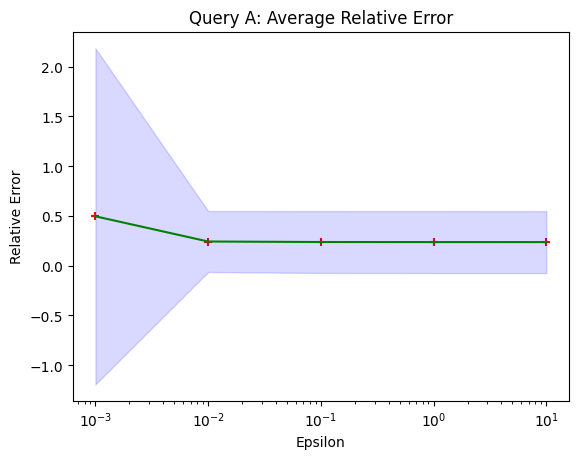

In [30]:
# Draw the relative error grach, with the standard deviation as a confidance interval
_, ax = plt.subplots(1)
ax.set(xscale='log', yscale='linear')
a_avg_errors = [np.mean(errors) for errors in errors_A]
a_std_errors = [np.std(errors) for errors in errors_A]
ax.scatter(epsilons, a_avg_errors, color='red', marker='+')
ax.plot(epsilons, a_avg_errors, color='green')
ax.fill_between(epsilons, np.add(a_avg_errors, a_std_errors), np.subtract(a_avg_errors, a_std_errors), color='blue', alpha=0.15)
ax.set_title("Query A: Average Relative Error")
ax.set_xlabel('Epsilon')
ax.set_ylabel('Relative Error')

plt.show()

### Q5. Assume that you allow an unlimited number of queries.

Actually, we have talked about this issue before when we design our laplace mechanism to perturb a sum. If we allow an unlimited number of queries, queries will have have an unlimit sensitivity. 

In this situation, take other methods like approximate differential privacy and the gaussian mechanism will be more easier for us. We add a new privacy parameter, the failure probability, to keep the accuracy. 

### Q6. What is the sensitivity of the function that computes a bin & histogram?

In histogram, the dataset are divided into squares of equal width, the change of one record in the dataset will only influence the data inside one square. And we could say that the sensiticity of the histogram and the bin all both 1.

So if we want to realease a histogram, we could add a 1/ε laplace noise to meet the ε differential privacy.

### Q7. Use the Laplace mechanism to comput equery H1.

In [31]:
sensitivity = 1
epsilon = 0.1

H1_noise = adult['education'].value_counts()+ np.random.laplace(loc=0, scale=sensitivity/epsilon)
H1_noise

HS-grad         9839.441553
Some-college    6677.441553
Bachelors       5043.441553
Masters         1626.441553
Assoc-voc       1306.441553
11th            1047.441553
Assoc-acdm      1007.441553
10th             819.441553
7th-8th          556.441553
Prof-school      541.441553
9th              454.441553
12th             376.441553
Doctorate        374.441553
5th-6th          287.441553
1st-4th          150.441553
Preschool         44.441553
Name: education, dtype: float64

In [32]:
type(H1_noise)

pandas.core.series.Series

In [33]:
# We would like to change the dataset into datafram type for further picture drawing.
df_H1=H1_noise.to_frame()
df_H1

education
HS-grad       9839.441553
Some-college  6677.441553
Bachelors     5043.441553
Masters       1626.441553
Assoc-voc     1306.441553
11th          1047.441553
Assoc-acdm    1007.441553
10th           819.441553
7th-8th        556.441553
Prof-school    541.441553
9th            454.441553
12th           376.441553
Doctorate      374.441553
5th-6th        287.441553
1st-4th        150.441553
Preschool       44.441553

<AxesSubplot: >

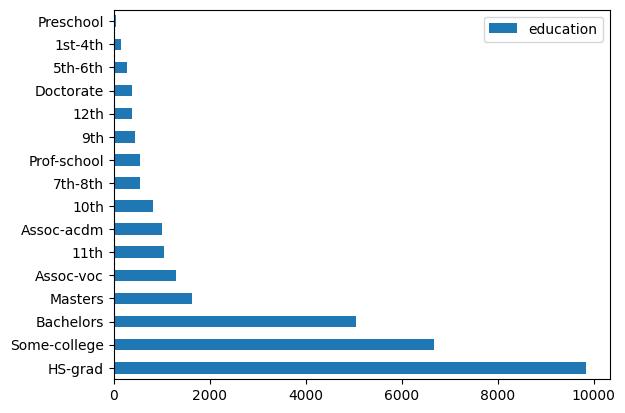

In [34]:
df_H1.plot.barh()

### Q8. Use the Laplace mechanism to comput equery H2.

In [35]:
# The same process as in Q7
sensitivity = 1
epsilon = 0.1

H2_noise = pd.cut(adult[adult['income'] == '>50K']['hours-per-week'], bins=10).value_counts()+ np.random.laplace(loc=0, scale=sensitivity/epsilon)
H2_noise

(30.4, 40.2]     3470.066577
(40.2, 50.0]     2282.066577
(59.8, 69.6]      743.066577
(50.0, 59.8]      427.066577
(69.6, 79.4]      143.066577
(20.6, 30.4]      129.066577
(10.8, 20.6]      106.066577
(79.4, 89.2]       65.066577
(89.2, 99.0]       33.066577
(0.902, 10.8]      30.066577
Name: hours-per-week, dtype: float64

In [36]:
df_H2=H2_noise.to_frame()
df_H2

hours-per-week
(30.4, 40.2]      3470.066577
(40.2, 50.0]      2282.066577
(59.8, 69.6]       743.066577
(50.0, 59.8]       427.066577
(69.6, 79.4]       143.066577
(20.6, 30.4]       129.066577
(10.8, 20.6]       106.066577
(79.4, 89.2]        65.066577
(89.2, 99.0]        33.066577
(0.902, 10.8]       30.066577

<AxesSubplot: >

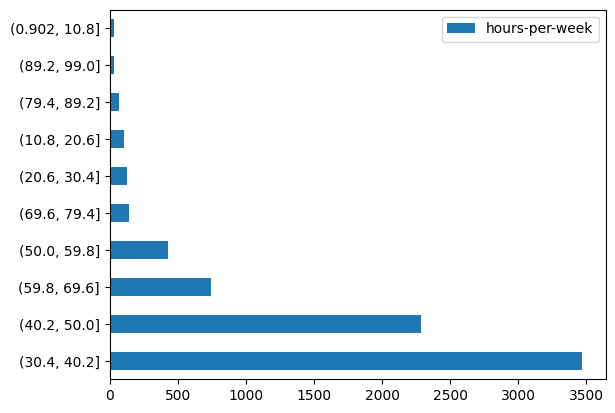

In [37]:
df_H2.plot.barh()